In [1]:
import sys
sys.path.insert(0, "/home/qite/my/pytorch-pose/")

In [2]:
from pose.datasets import Mpii
mpii = Mpii(jsonfile='/home/qite/my/pytorch-pose/data/mpii/mpii_annotations.json',
            img_folder='/home/qite/my/pytorch-pose/data/mpii/images',
            meanstd_file='/home/qite/my/pytorch-pose/data/mpii/mean.pth.tar',
            sigma=1, label_type="Gaussian", label_data=Mpii.LABEL_PARTS_MAP)

    Mean: 0.4404, 0.4440, 0.4327
    Std:  0.2458, 0.2410, 0.2468


20700
[[   0.    0.    0.]
 [   0.    0.    0.]
 [ 100.  617.    1.]
 [ 257.  499.    0.]
 [ 646.  470.    1.]
 [   0.    0.    0.]
 [ 179.  558.    0.]
 [ 313.  226.    0.]
 [ 405.  208.    1.]
 [ 710.  150.    1.]
 [ 477.  640.    1.]
 [ 235.  613.    1.]
 [ 220.  301.    1.]
 [ 406.  150.    0.]
 [ 425.  394.    0.]
 [ 518.  561.    1.]]
[[ 19.  15.   0.]
 [ 19.  15.   0.]
 [ 28.  31.   1.]
 [ 31.  27.   0.]
 [ 42.  23.   1.]
 [ 19.  15.   0.]
 [ 29.  29.   0.]
 [ 30.  19.   0.]
 [ 33.  17.   1.]
 [ 41.  13.   1.]
 [ 38.  29.   1.]
 [ 31.  30.   1.]
 [ 28.  21.   1.]
 [ 32.  16.   0.]
 [ 35.  22.   0.]
 [ 39.  26.   1.]]


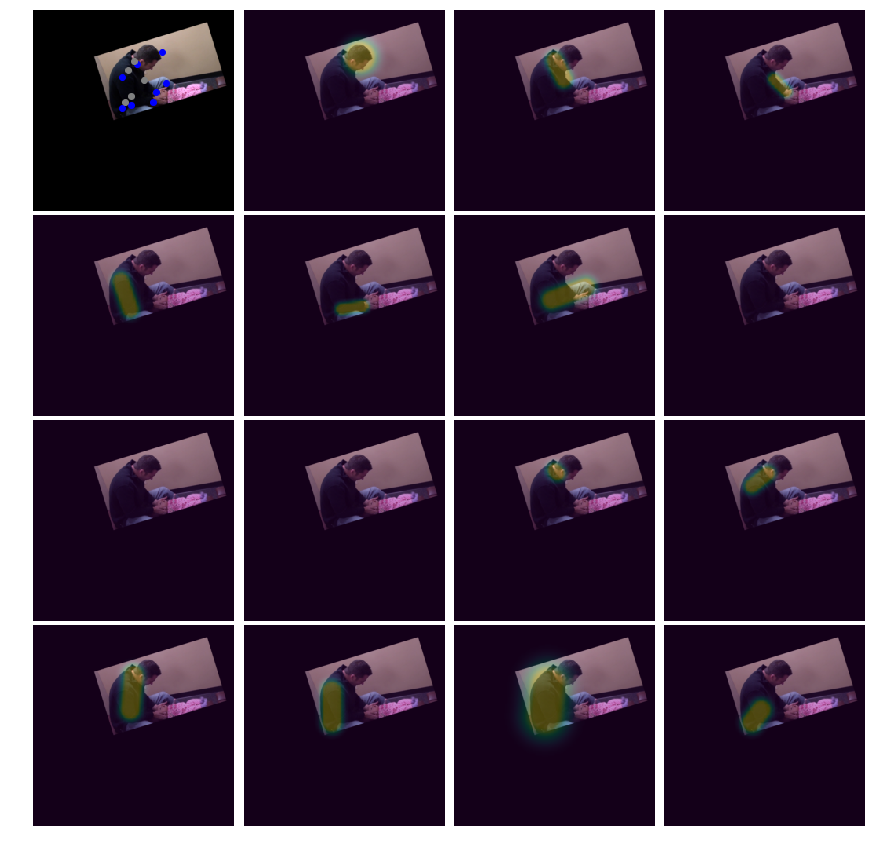

In [4]:
%matplotlib inline
import numpy as np
from scipy.misc import imresize
import matplotlib.pyplot as plt
from pose.utils.misc import to_numpy

fig, axs = plt.subplots(4, 4, figsize=(15, 15), gridspec_kw={'wspace':0.02, 'hspace':0.02})
img_idx = np.random.randint(0, len(mpii))
img_idx = 20700
print(img_idx)
np.seterr(invalid='raise')
img, target, meta = mpii[img_idx]
pts = to_numpy(meta['pts'])
tpts = to_numpy(meta['tpts'])
print(pts)
print(tpts)
xs = tpts[:, 0] * 4
ys = tpts[:, 1] * 4
real_img = to_numpy(img+mpii.mean.view(3,1,1).expand_as(img)).transpose(1,2,0)
axs[0,0].imshow(real_img)
not_annoted = (np.isclose(pts, 0).sum(1) == 3)
visible = (pts[:, 2] == 1)
axs[0,0].scatter(xs[~not_annoted & visible], ys[~not_annoted & visible], color='blue')
axs[0,0].scatter(xs[~not_annoted & ~visible], ys[~not_annoted & ~visible], color='gray')
axs[0,0].axis('off')
# final_img = np.zeros(to_numpy(target[0]).shape)
for i, t in enumerate(target):
    # final_img += to_numpy(target[i])
    axs.flat[i+1].imshow(real_img)
    timg = imresize(to_numpy(target[i]), real_img.shape[:2])
    axs.flat[i+1].imshow(timg, alpha=0.3)
    axs.flat[i+1].axis('off')
    
# fig2, axs2 = pt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'wspace':0.02, 'hspace':0.02})

#axs[0,1].imshow(final_img)